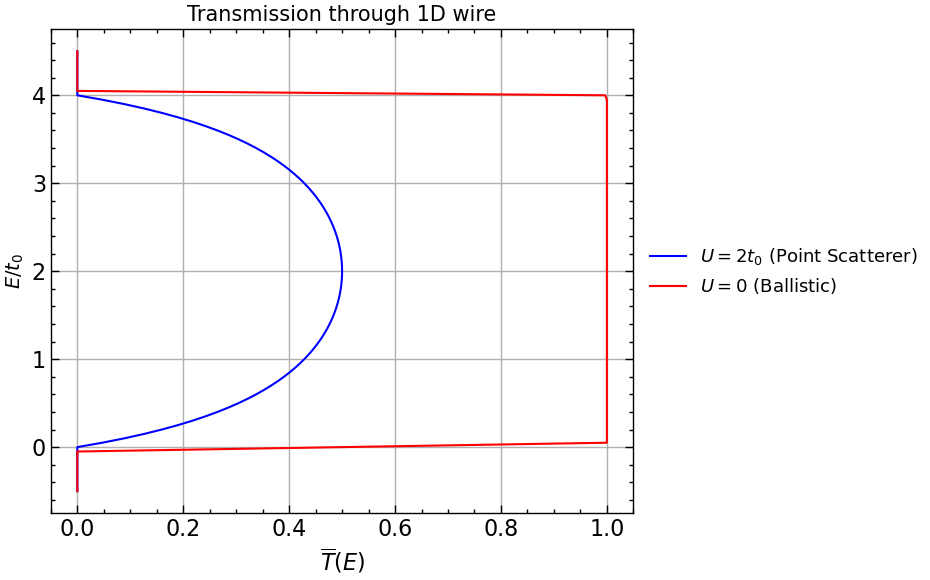

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["science" , "notebook"])

# === Parameters ===
t0 =  1.0               # Hopping energy
Np = 11                # Number of sites in the wire
VV = 0.0               # Potential drop (set to 0 here)
UB1 = 2 * t0           # Scatterer potential at site N1
UB2 = 0 * 2 * t0       # Scatterer at site N2 (not affecting anything here)
N1, N2 = 5, 9          # Indices of scatterers

# === Build the tight-binding Hamiltonian ===
main_diag = 2 * t0 * np.ones(Np)
off_diag = -t0 * np.ones(Np - 1)
H0 = np.diag(main_diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1)

# Add point scatterers
H0[N1, N1] += UB1
H0[N2, N2] += UB2

# Linear potential (for generality, but VV=0 for now)
UV = np.linspace(0, -VV, Np)
U = np.diag(UV)

# === Energy Sweep Parameters ===
dE = 0.05
E_list = np.arange(-0.5, 4.5 + dE, dE) * t0
Tcoh = []  # Transmission

# === Energy Loop ===
zplus = 1j * 1e-12
for EE in E_list:
    # ---- Self-energy from left lead ----
    ck1 = 1 - (EE - UV[0] + zplus) / (2 * t0)
    ka1 = np.arccos(ck1)
    s1 = -t0 * np.exp(1j * ka1)
    Sigma1 = np.zeros((Np, Np), dtype=complex)
    Sigma1[0, 0] = s1

    # ---- Self-energy from right lead ----
    ck2 = 1 - (EE - UV[-1] + zplus) / (2 * t0)
    ka2 = np.arccos(ck2)
    s2 = -t0 * np.exp(1j * ka2)
    Sigma2 = np.zeros((Np, Np), dtype=complex)
    Sigma2[-1, -1] = s2

    # ---- Broadening matrices ----
    Gamma1 = 1j * (Sigma1 - Sigma1.conj().T)
    Gamma2 = 1j * (Sigma2 - Sigma2.conj().T)

    # ---- Green's function ----
    G_R = np.linalg.inv((EE + zplus) * np.eye(Np) - H0 - U - Sigma1 - Sigma2)

    # ---- Transmission ----
    T = np.real(np.trace(Gamma1 @ G_R @ Gamma2 @ G_R.conj().T))
    Tcoh.append(T)


# Ballistic 
UB1_b = 0* 2 * t0           
UB2_b = 0 * 2 * t0      
N1, N2 = 3, 9         

# === Build the tight-binding Hamiltonian ===
main_diag = 2 * t0 * np.ones(Np)
off_diag = -t0 * np.ones(Np - 1)
H0 = np.diag(main_diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1)

# Add point scatterers
H0[N1, N1] += UB1_b
H0[N2, N2] += UB2_b

# Linear potential (for generality, but VV=0 for now)
UV = np.linspace(0, -VV, Np)
U = np.diag(UV)

# === Energy Sweep Parameters ===
dE = 0.05
E_list_b = np.arange(-0.5, 4.5 + dE, dE) * t0
Tcoh_b = []  # Transmission

# === Energy Loop ===
zplus = 1j * 1e-16
for EE in E_list_b:
    # ---- Self-energy from left lead ----
    ck1 = 1 - (EE - UV[0] + zplus) / (2 * t0)
    ka1 = np.arccos(ck1)
    s1 = -t0 * np.exp(1j * ka1)
    Sigma1 = np.zeros((Np, Np), dtype=complex)
    Sigma1[0, 0] = s1

    # ---- Self-energy from right lead ----
    ck2 = 1 - (EE - UV[-1] + zplus) / (2 * t0)
    ka2 = np.arccos(ck2)
    s2 = -t0 * np.exp(1j * ka2)
    Sigma2 = np.zeros((Np, Np), dtype=complex)
    Sigma2[-1, -1] = s2

    # ---- Broadening matrices ----
    Gamma1 = 1j * (Sigma1 - Sigma1.conj().T)
    Gamma2 = 1j * (Sigma2 - Sigma2.conj().T)

    # ---- Green's function ----
    G_R = np.linalg.inv((EE + zplus) * np.eye(Np) - H0 - U - Sigma1 - Sigma2)

    # ---- Transmission ----
    T = np.real(np.trace(Gamma1 @ G_R @ Gamma2 @ G_R.conj().T))
    Tcoh_b.append(T)


plt.figure(figsize=(9.5, 6))

# Plot transmission curves
plt.plot(Tcoh , E_list/t0 , 'b', linewidth=1.5 , label = r"$U = 2t_0$ (Point Scatterer)")
plt.plot(Tcoh_b, E_list_b/t0 , 'r', linewidth=1.5 , label = r"$U = 0$ (Ballistic)")

# Axis labels
plt.xlabel(r"$\overline{T}(E)$", fontsize=16)
plt.ylabel(r"$E / t_0$", fontsize=14)
plt.title("Transmission through 1D wire", fontsize=15)

# Clean legend placement
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, frameon=False)

plt.grid(True)
plt.tight_layout()
plt.show()
